In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [18]:
# csv_path = os.path.join(path, "station_hour.csv")
df = pd.read_csv("Station_hour.csv")

C:\Users\DELL-PC\AppData\Local\Temp\ipykernel_20300\3170312368.py:2: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("Station_hour.csv")


In [19]:
df.head()

,StationId,Datetime,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,AP001,2017-11-24 17:00:00,60.50,98.00,2.35,30.80,18.25,8.50,0.1,11.85,126.40,0.1,6.10,0.10,NaN,NaN
1,AP001,2017-11-24 18:00:00,65.50,111.25,2.70,24.20,15.07,9.77,0.1,13.17,117.12,0.1,6.25,0.15,NaN,NaN
2,AP001,2017-11-24 19:00:00,80.00,132.00,2.10,25.18,15.15,12.02,0.1,12.08,98.98,0.2,5.98,0.18,NaN,NaN
3,AP001,2017-11-24 20:00:00,81.50,133.25,1.95,16.25,10.23,11.58,0.1,10.47,112.20,0.2,6.72,0.10,NaN,NaN
4,AP001,2017-11-24 21:00:00,75.25,116.00,1.43,17.48,10.43,12.03,0.1,9.12,106.35,0.2,5.75,0.08,NaN,NaN


In [20]:
df['Datetime'] = pd.to_datetime(df['Datetime'])

In [21]:
print("Dataset Info:")
print(df.info())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2589083 entries, 0 to 2589082
Data columns (total 16 columns):
 #   Column      Dtype         
---  ------      -----         
 0   StationId   object        
 1   Datetime    datetime64[ns]
 2   PM2.5       float64       
 3   PM10        float64       
 4   NO          float64       
 5   NO2         float64       
 6   NOx         float64       
 7   NH3         float64       
 8   CO          float64       
 9   SO2         float64       
 10  O3          float64       
 11  Benzene     float64       
 12  Toluene     float64       
 13  Xylene      float64       
 14  AQI         float64       
 15  AQI_Bucket  object        
dtypes: datetime64[ns](1), float64(13), object(2)
memory usage: 316.1+ MB
None


In [22]:
print("\nFirst 5 rows:")
print(df.head())


First 5 rows:
  StationId            Datetime  PM2.5    PM10    NO    NO2    NOx    NH3  \
0     AP001 2017-11-24 17:00:00  60.50   98.00  2.35  30.80  18.25   8.50   
1     AP001 2017-11-24 18:00:00  65.50  111.25  2.70  24.20  15.07   9.77   
2     AP001 2017-11-24 19:00:00  80.00  132.00  2.10  25.18  15.15  12.02   
3     AP001 2017-11-24 20:00:00  81.50  133.25  1.95  16.25  10.23  11.58   
4     AP001 2017-11-24 21:00:00  75.25  116.00  1.43  17.48  10.43  12.03   

    CO    SO2      O3  Benzene  Toluene  Xylene  AQI AQI_Bucket  
0  0.1  11.85  126.40      0.1     6.10    0.10  NaN        NaN  
1  0.1  13.17  117.12      0.1     6.25    0.15  NaN        NaN  
2  0.1  12.08   98.98      0.2     5.98    0.18  NaN        NaN  
3  0.1  10.47  112.20      0.2     6.72    0.10  NaN        NaN  
4  0.1   9.12  106.35      0.2     5.75    0.08  NaN        NaN  


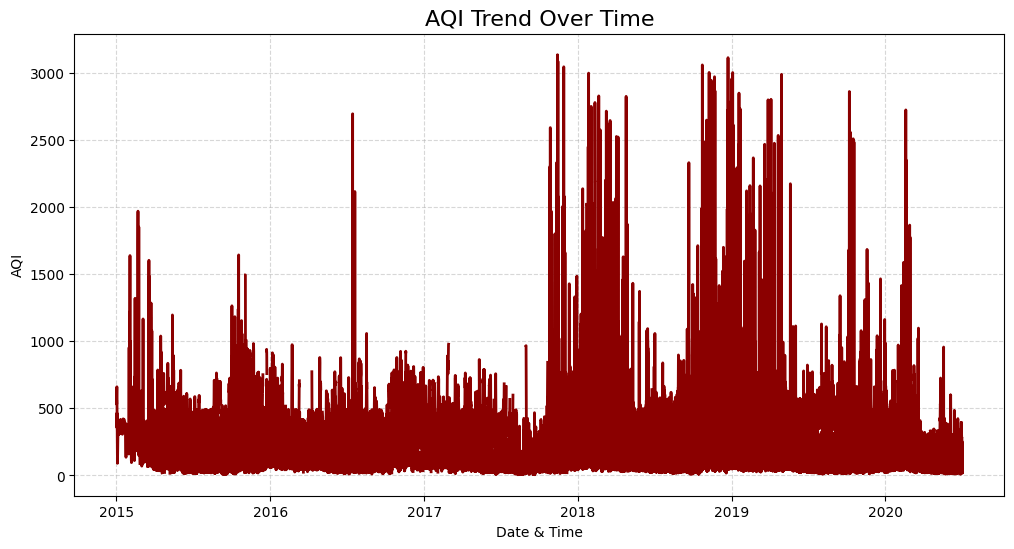

In [23]:
pollutants = ["PM2.5", "PM10", "CO", "NO2", "O3", "SO2"]
aqi_col = "AQI"

plt.figure(figsize=(12,6))
plt.plot(df["Datetime"], df[aqi_col], color="darkred", linewidth=2)
plt.title("AQI Trend Over Time", fontsize=16)
plt.xlabel("Date & Time")
plt.ylabel("AQI")
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()

C:\Users\DELL-PC\AppData\Local\Programs\Python\Python314\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


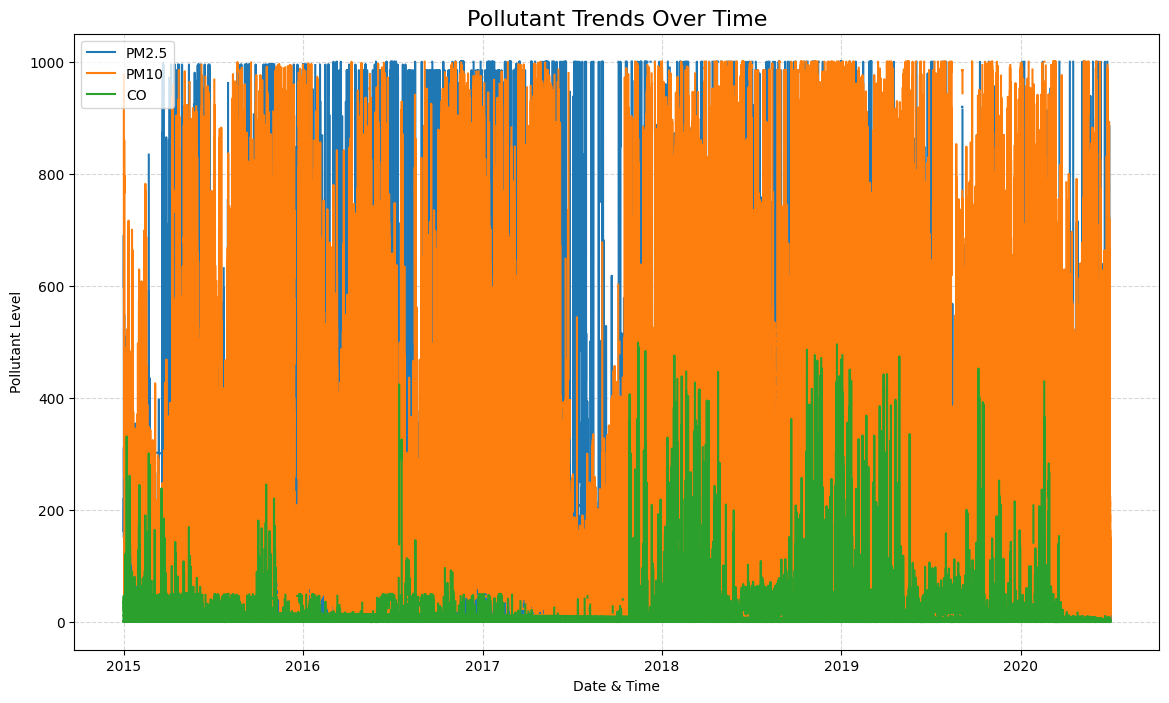

In [24]:
plt.figure(figsize=(14,8))
for pollutant in ["PM2.5", "PM10", "CO"]:
    plt.plot(df["Datetime"], df[pollutant], label=pollutant)
plt.title("Pollutant Trends Over Time", fontsize=16)
plt.xlabel("Date & Time")
plt.ylabel("Pollutant Level")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()

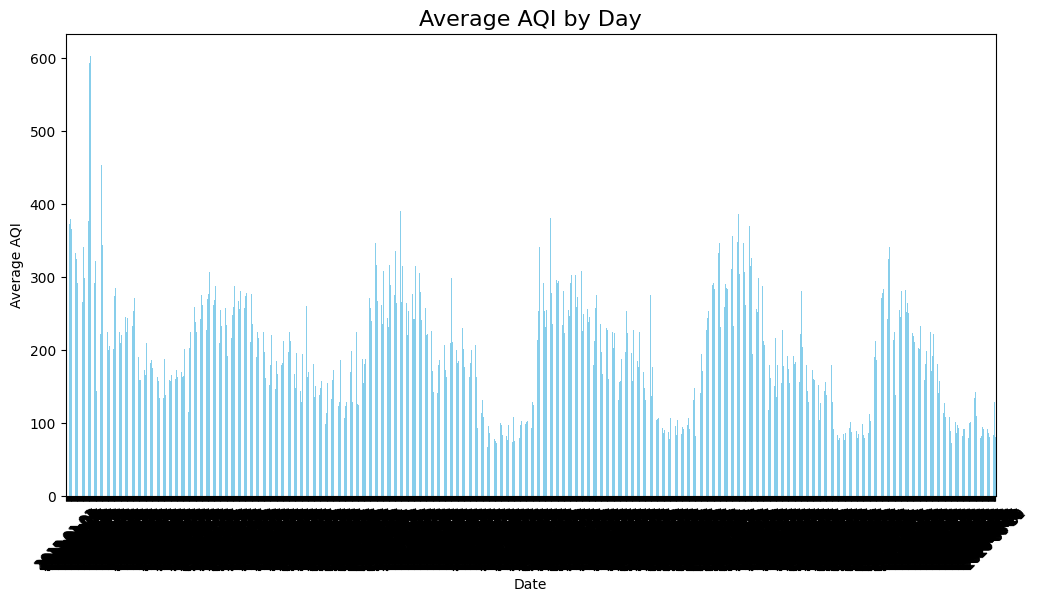

In [25]:
df['Date'] = df['Datetime'].dt.date
avg_aqi_per_day = df.groupby('Date')["AQI"].mean()

plt.figure(figsize=(12,6))
avg_aqi_per_day.plot(kind='bar', color="skyblue")
plt.title("Average AQI by Day", fontsize=16)
plt.xlabel("Date")
plt.ylabel("Average AQI")
plt.xticks(rotation=45)
plt.show()

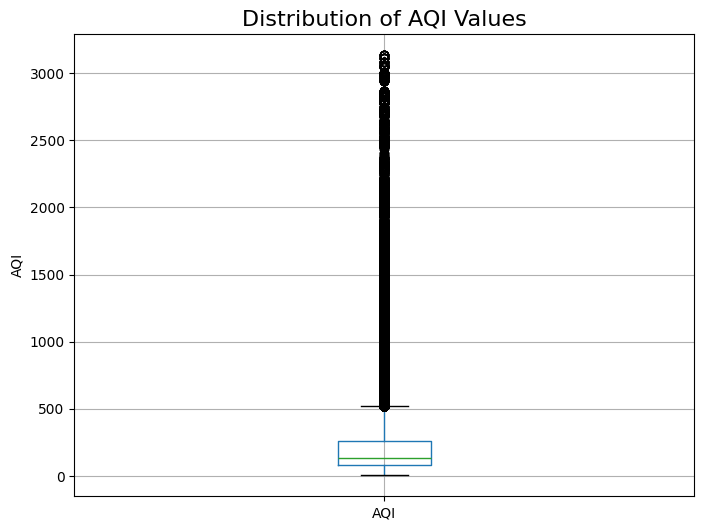

In [26]:
plt.figure(figsize=(8,6))
df.boxplot(column="AQI")
plt.title("Distribution of AQI Values", fontsize=16)
plt.ylabel("AQI")
plt.show()

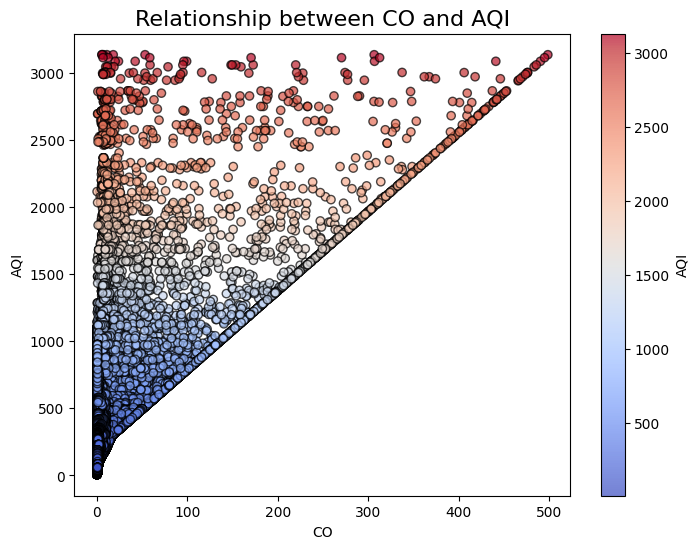

In [27]:
plt.figure(figsize=(8,6))
plt.scatter(df["CO"], df["AQI"], c=df["AQI"], cmap="coolwarm", alpha=0.7, edgecolors="k")
plt.title("Relationship between CO and AQI", fontsize=16)
plt.xlabel("CO")
plt.ylabel("AQI")
plt.colorbar(label="AQI")
plt.show()